# gathering data

In [42]:
modes = [(2,2), (3,2), (4,4)]

In [43]:
import hybrid_utils

In [44]:
import matplotlib.pyplot as plt

In [45]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
import numpy as np

In [46]:
import sxs

In [47]:
from spherical_functions import LM_index

In [48]:
catalog = sxs.load("catalog")

In [49]:
catalog_filtered = catalog.table[
    (catalog.table['object_types'] == 'BHBH')
    & (catalog.table['reference_mass_ratio'].round(3) == 1)
    & (catalog.table['reference_chi1_mag'].round(3) == 0)
    & (catalog.table['reference_chi2_mag'].round(3) == 0)
    & (catalog.table['reference_chi1_perp'].round(3) == 0)
    & (catalog.table['reference_chi2_perp'].round(3) == 0)
    & (catalog.table.fillna(0, axis=1)['reference_eccentricity_bound'].astype(float).round(3) <= 1e-3)
]

In [50]:
catalog_filtered

object_types  initial_separation  initial_orbital_frequency  \
SXS:BBH:0001         BHBH           18.000000                   0.012203   
SXS:BBH:0002         BHBH           19.000000                   0.011292   
SXS:BBH:0066         BHBH           18.000100                   0.012202   
SXS:BBH:0067         BHBH           18.001000                   0.012202   
SXS:BBH:0070         BHBH           18.000000                   0.012202   
SXS:BBH:0071         BHBH           17.999900                   0.012202   
SXS:BBH:0072         BHBH           17.999000                   0.012202   
SXS:BBH:0086         BHBH           18.000000                   0.012207   
SXS:BBH:0090         BHBH           19.000000                   0.011296   
SXS:BBH:0180         BHBH           18.000000                   0.012202   
SXS:BBH:0389         BHBH           15.428589                   0.015246   
SXS:BBH:1132         BHBH           23.127165                   0.008518   
SXS:BBH:1153         BHBH           20.790283                   0.009930   
SXS:BBH:1154         BHBH           20.790283                   0.009934   
SXS:BBH:1155         BHBH           20.790283                   0.009934   

              initial_adot  initial_ADM_energy  \
SXS:BBH:0001     -0.000025            0.993736   
SXS:BBH:0002     -0.000021            0.994031   
SXS:BBH:0066     -0.000025            0.993735   
SXS:BBH:0067     -0.000025            0.993737   
SXS:BBH:0070     -0.000025            0.993735   
SXS:BBH:0071     -0.000025            0.993735   
SXS:BBH:0072     -0.000025            0.993734   
SXS:BBH:0086     -0.000022            0.993742   
SXS:BBH:0090     -0.000025            0.994035   
SXS:BBH:0180     -0.000025            0.993735   
SXS:BBH:0389     -0.000037            0.992786   
SXS:BBH:1132     -0.000005            0.994988   
SXS:BBH:1153     -0.000010            0.994471   
SXS:BBH:1154     -0.000008            0.994475   
SXS:BBH:1155     -0.000008            0.994475   

                                   initial_ADM_linear_momentum  \
SXS:BBH:0001     [7.5160071e-09, 2.4389069e-09, -5.798632e-10]   
SXS:BBH:0002   [1.6810827e-09, 1.4244131e-09, -1.14839759e-08]   
SXS:BBH:0066   [-3.1483019e-09, -3.7937639e-09, 1.4360428e-09]   
SXS:BBH:0067    [2.1710304e-09, 4.5983196e-09, -3.2701829e-09]   
SXS:BBH:0070    [1.2353239e-09, -4.8770037e-09, 2.5460439e-09]   
SXS:BBH:0071      [3.911247e-10, 6.306938e-10, -1.2207419e-08]   
SXS:BBH:0072        [-1.571719e-10, 1.33716e-11, 8.710264e-10]   
SXS:BBH:0086     [7.2481579e-09, 2.7691121e-09, 1.0813396e-09]   
SXS:BBH:0090      [2.455327e-10, -5.965038e-10, 8.2258836e-09]   
SXS:BBH:0180                    [5e-15, 3.539e-13, -3.778e-13]   
SXS:BBH:0389      [-2.940568e-10, 1.2680514e-09, -1.73795e-11]   
SXS:BBH:1132         [-2.156564e-10, 3.97011e-10, 4.51632e-11]   
SXS:BBH:1153   [-8.52379115e-08, -6.50011757e-08, -3.6786e-12]   
SXS:BBH:1154  [-8.67044966e-08, -1.227347207e-07, 1.66055e-11]   
SXS:BBH:1155  [-7.71528799e-08, -1.183423093e-07, 3.16491e-11]   

              initial_ADM_linear_momentum_mag  \
SXS:BBH:0001                     7.923059e-09   
SXS:BBH:0002                     1.169345e-08   
SXS:BBH:0066                     5.134848e-09   
SXS:BBH:0067                     6.045826e-09   
SXS:BBH:0070                     5.638575e-09   
SXS:BBH:0071                     1.222996e-08   
SXS:BBH:0072                     8.851942e-10   
SXS:BBH:0086                     7.834097e-09   
SXS:BBH:0090                     8.251137e-09   
SXS:BBH:0180                     5.176901e-13   
SXS:BBH:0389                     1.301816e-09   
SXS:BBH:1132                     4.540541e-10   
SXS:BBH:1153                     1.071945e-07   
SXS:BBH:1154                     1.502714e-07   
SXS:BBH:1155                     1.412709e-07   

                                   initial_ADM_angular_momentum  \
SXS:BBH:0001  [4.27581822e-08, -2.342625073e-07, 1.184715566...   
SXS:BBH:0002  [2.76

In [51]:
# %%time
# # hack together extrapolation vs finite radius comparison
# waveforms_sxs = {}
# for name in catalog_filtered.index[:2]:
#     location = f"{name}/Lev/rhOverM"
#     waveforms_sxs[name] = sxs.load(location)

# wfs = {}
# wfs['SXS:BBH:0002_Extrap'] = waveforms_sxs['SXS:BBH:0002']['Extrapolated_N2.dir'].copy()
# wfs['SXS:BBH:0002_Finite'] = waveforms_sxs['SXS:BBH:0002']['OutermostExtraction.dir'].copy()

# waveforms_sxs = wfs.copy()

# for name in waveforms_sxs.keys():
#     waveforms_sxs[name].time = waveforms_sxs[name].time - waveforms_sxs[name].max_norm_time()

In [52]:
%%time
waveforms_sxs = {}
extrapolation_order = 2
for name in catalog_filtered.index:
    location = f"{name}/Lev/rhOverM"
    waveforms_sxs[name] = sxs.load(location, extrapolation_order=extrapolation_order)
    waveforms_sxs[name].time = waveforms_sxs[name].time - waveforms_sxs[name].max_norm_time()

Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0002v7/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0066v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0067v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0070v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0071v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0072v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0086v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to loa

In [53]:
LM_index(2,2,2)

4

In [54]:
LM_index(3,2,2)

10

In [55]:
plt.figure(figsize=(14,6))
for name in waveforms_sxs.keys():
    plt.plot(waveforms_sxs[name].t, np.abs(waveforms_sxs[name].data[:,LM_index(3,2,2)]), label=name)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim(-100, 100)
# plt.yscale('log')

In [56]:
# do we have to resample this??

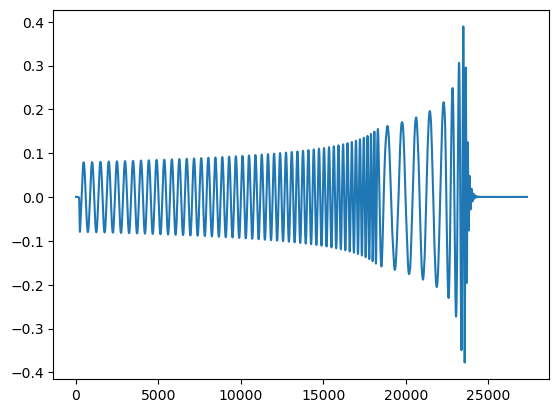

In [57]:
plt.plot(waveforms_sxs['SXS:BBH:0001'].data[:,4].real)

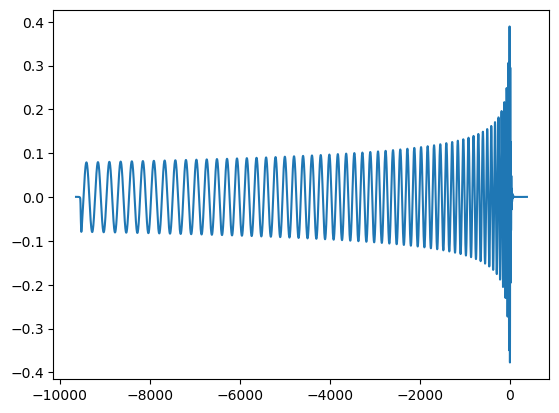

In [58]:
plt.plot(waveforms_sxs['SXS:BBH:0001'].t, waveforms_sxs['SXS:BBH:0001'].data[:,4].real)

In [59]:
# convert to 'wf' dict

In [60]:
resample = True
wfs_sxs = {}
for k in waveforms_sxs.keys():

    # resample
    if resample:
        dt = 1
        t = waveforms_sxs[k].t
        t_start = t[0]
        t_end = t[-1]
        new_t = np.arange(t_start, t_end, dt)
    else:
        new_t = t



    
    wfs_sxs[k] = {}
    wfs_sxs[k]['t'] = new_t
    wfs_sxs[k]['hlm'] = {}
    for mode in modes:
        l = mode[0]
        m = mode[1]
        index = LM_index(l, m, 2)
        if resample:
            wf_data = waveforms_sxs[k].data[:,index]
            wf_data_real = IUS(t, wf_data.real)(new_t)
            wf_data_imag = IUS(t, wf_data.imag)(new_t)
            wf_data = wf_data_real + 1.j*wf_data_imag
        else:
            wf_data = waveforms_sxs[k].data[:,index]
        wfs_sxs[k]['hlm'][mode] = wf_data

In [61]:
plt.plot(wfs_sxs['SXS:BBH:0001']['hlm'][2,2].real)

In [62]:
plt.plot(wfs_sxs['SXS:BBH:0001']['t'], wfs_sxs['SXS:BBH:0001']['hlm'][2,2].real)
plt.xlim(-100, 100)

(-100.0, 100.0)

In [63]:
# trim times
# remove inital junk and final noise
t_start_fraction = 0.9
t_end = 100
for k in wfs_sxs.keys():
    t_start = wfs_sxs[k]['t'][0] * t_start_fraction
    print(t_start)
    # t_start = -4000
    mask = (wfs_sxs[k]['t'] > t_start) & (wfs_sxs[k]['t'] < t_end)
    wfs_sxs[k]['t'] = wfs_sxs[k]['t'][mask]
    for mode in modes:
        wfs_sxs[k]['hlm'][mode] = wfs_sxs[k]['hlm'][mode][mask]

-8674.667152966653
-10750.042907387391
-8667.696400008763
-8675.7981719348
-8666.91942801087
-8665.986079378981
-8657.960729795634
-8707.793444586878
-10761.521440101233
-8666.580298158842
-4655.847769236977
-23030.539841160036
-15092.283414523923
-15139.405949495547
-15141.936278105648


In [64]:
for k in wfs_sxs.keys():
    wfs_sxs[k] = hybrid_utils.compute_amplitude(wfs_sxs[k])
    wfs_sxs[k] = hybrid_utils.compute_phase(wfs_sxs[k])
    wfs_sxs[k] = hybrid_utils.compute_frequency(wfs_sxs[k], filter_params={'window_length':1000, 'polyorder':2})

In [65]:
wfs_sxs.keys()

dict_keys(['SXS:BBH:0001', 'SXS:BBH:0002', 'SXS:BBH:0066', 'SXS:BBH:0067', 'SXS:BBH:0070', 'SXS:BBH:0071', 'SXS:BBH:0072', 'SXS:BBH:0086', 'SXS:BBH:0090', 'SXS:BBH:0180', 'SXS:BBH:0389', 'SXS:BBH:1132', 'SXS:BBH:1153', 'SXS:BBH:1154', 'SXS:BBH:1155'])

In [66]:
wfs_sxs['SXS:BBH:0002'].keys()

dict_keys(['t', 'hlm', 'amp', 'phase', 'freq'])

In [67]:
# estimate number of orbits
n_orbits = {}
for k in wfs_sxs.keys():
    n_orbits[k] = np.around((wfs_sxs[k]['phase'][2,2][0] - wfs_sxs[k]['phase'][2,2][-1])/2 / 2 / np.pi, 3)

In [68]:
n_orbits

{'SXS:BBH:0001': 30.131,
 'SXS:BBH:0002': 33.07,
 'SXS:BBH:0066': 29.929,
 'SXS:BBH:0067': 30.117,
 'SXS:BBH:0070': 29.965,
 'SXS:BBH:0071': 29.979,
 'SXS:BBH:0072': 30.099,
 'SXS:BBH:0086': 30.19,
 'SXS:BBH:0090': 34.203,
 'SXS:BBH:0180': 30.853,
 'SXS:BBH:0389': 21.986,
 'SXS:BBH:1132': 54.494,
 'SXS:BBH:1153': 42.423,
 'SXS:BBH:1154': 42.482,
 'SXS:BBH:1155': 42.495}

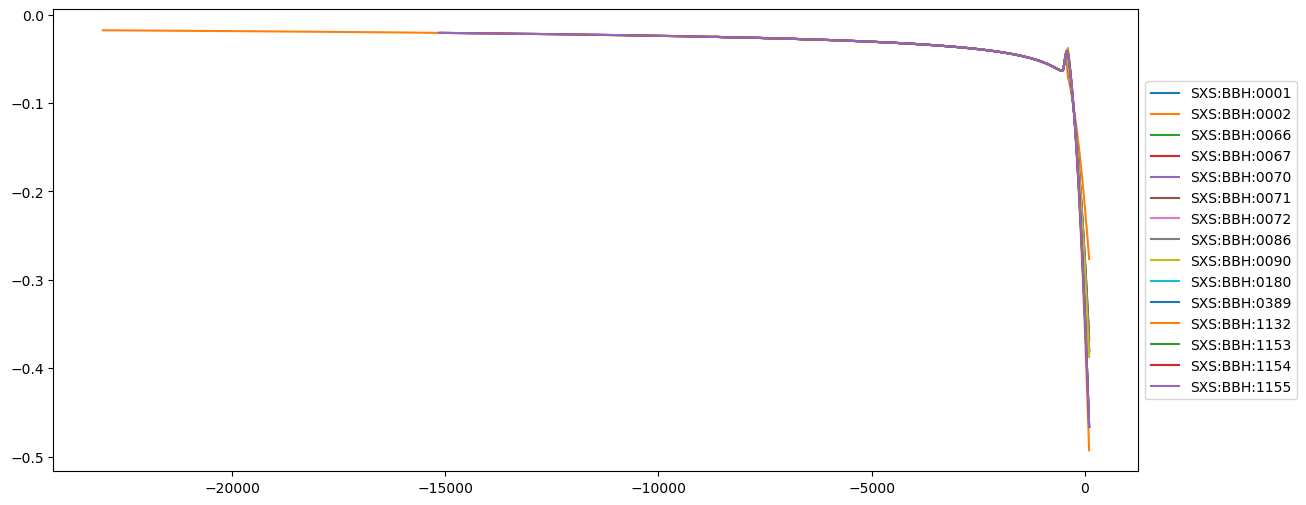

In [69]:
plt.figure(figsize=(14,6))
for k in wfs_sxs.keys():
    plt.plot(wfs_sxs[k]['t'], wfs_sxs[k]['freq'][2,2], label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim(-100, 100)
# plt.yscale('log')

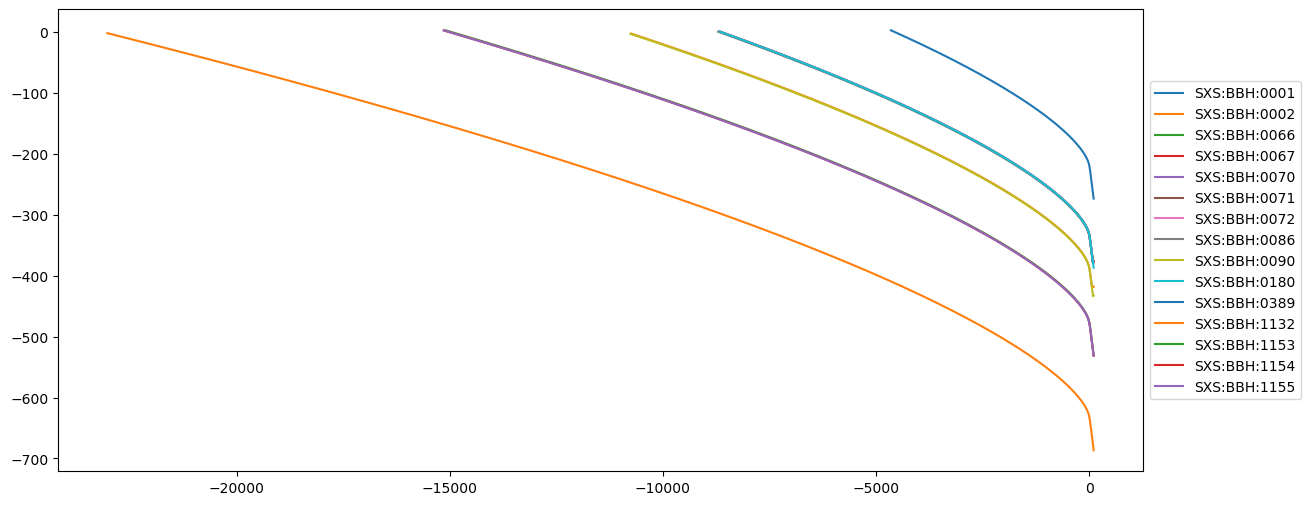

In [70]:
plt.figure(figsize=(14,6))
for k in wfs_sxs.keys():
    plt.plot(wfs_sxs[k]['t'], wfs_sxs[k]['phase'][2,2], label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim(-100, 100)
# plt.yscale('log')

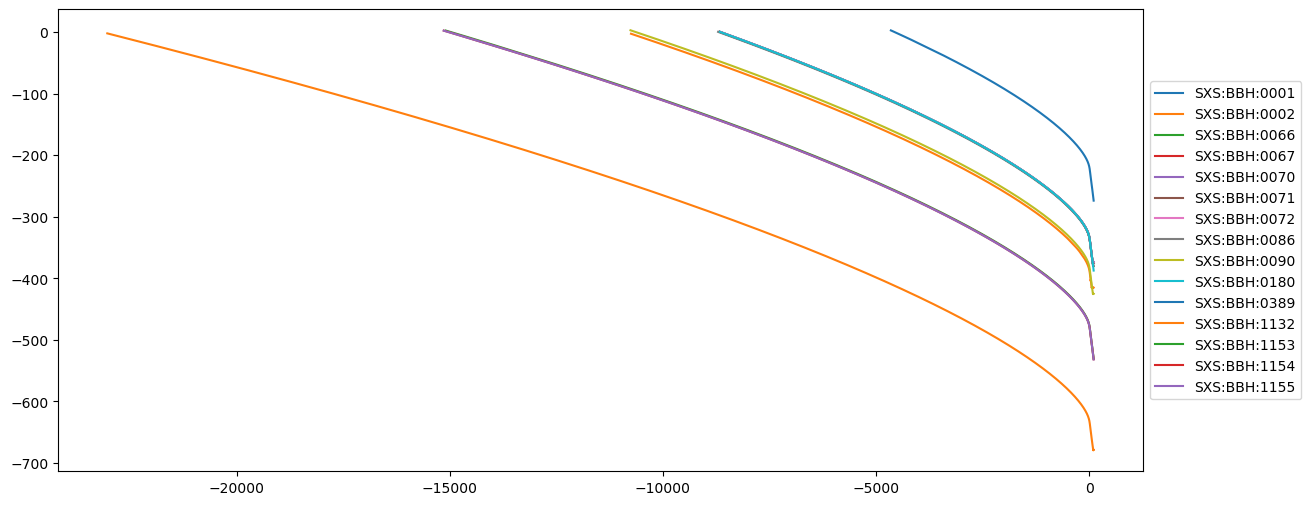

In [71]:
plt.figure(figsize=(14,6))
for k in wfs_sxs.keys():
    plt.plot(wfs_sxs[k]['t'], wfs_sxs[k]['phase'][3,2], label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim(-100, 100)
# plt.yscale('log')

In [72]:
plt.figure(figsize=(14,6))
k = 'SXS:BBH:0090'
plt.plot(wfs_sxs[k]['t'], wfs_sxs[k]['phase'][2,2], label=k)
plt.plot(wfs_sxs[k]['t'], wfs_sxs[k]['phase'][3,2], label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim(-100, 100)
# plt.yscale('log')

(-0.0001, 0.0001)

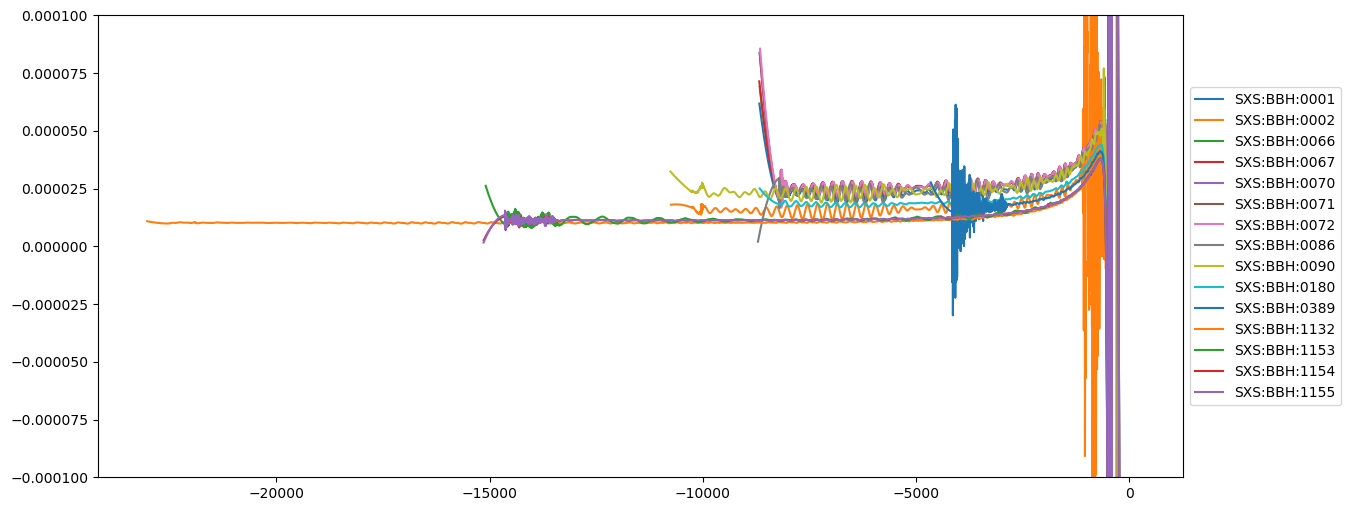

In [73]:
l=3
m=2
plt.figure(figsize=(14,6))
for k in wfs_sxs.keys():
    plt.plot(wfs_sxs[k]['t'], wfs_sxs[k]['freq'][l,m]-m*wfs_sxs[k]['freq'][2,2]/2, label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim(-300, 100)
plt.ylim(-0.0001,0.0001)
# plt.yscale('log')

In [74]:
# # rotate all waveforms such that the phase of the 22 mode is 0 at t=0?

# for k in wfs_sxs.keys():
#     # get index of peak
#     max_idx = np.abs(wfs_sxs[k]['hlm'][2,2]).argmax()
#     # get phase of 22 at peak
#     phi_ref_22 = wfs_sxs[k]['phase'][2,2][max_idx]
#     # divide by 2 to estimate the 'orbital'
#     phi_ref_orb = phi_ref_22/2

#     # for mode in modes:
#     #     m = mode[1]
#     #     wfs_sxs[k]['hlm'][mode] = wfs_sxs[k]['hlm'][mode] * np.exp(-1.j*m*phi_ref_orb)
    
#     # wfs_sxs[k] = hybrid_utils.compute_phase(wfs_sxs[k])
    
#     for mode in modes:
#         m = mode[1]
#         wfs_sxs[k]['phase'][mode] = wfs_sxs[k]['phase'][mode] - (m*phi_ref_orb)
    
    


In [75]:
# here we compute
# delta_phi = phi_lm - m*phi_22/2
# we unwrap delta_phi
# then we take mod 2pi
# then we try and fix cases that fail to unwrap by subtracting 2pi from cases where this is > 1
# not sure if the is correct though...

l = 3
m = 2

delta_phis = {}
for k in wfs_sxs.keys():
    # my def
    delta_phis[k] = np.mod(np.unwrap(wfs_sxs[k]['phase'][l,m]-m*wfs_sxs[k]['phase'][2,2]/2), 2*np.pi)
    # XHM def
    # delta_phis[k] = np.mod(np.unwrap(2*wfs_sxs[k]['phase'][l,m]-m*wfs_sxs[k]['phase'][2,2]), 2*np.pi)

for k in delta_phis.keys():
    delta_phi = np.array(delta_phis[k])
    mask = delta_phi > 1
    delta_phi[mask] = delta_phi[mask]-2*np.pi
    delta_phis[k] = delta_phi

Text(0.5, 1.0, '$\\phi_{32} - \\phi_{22}$')

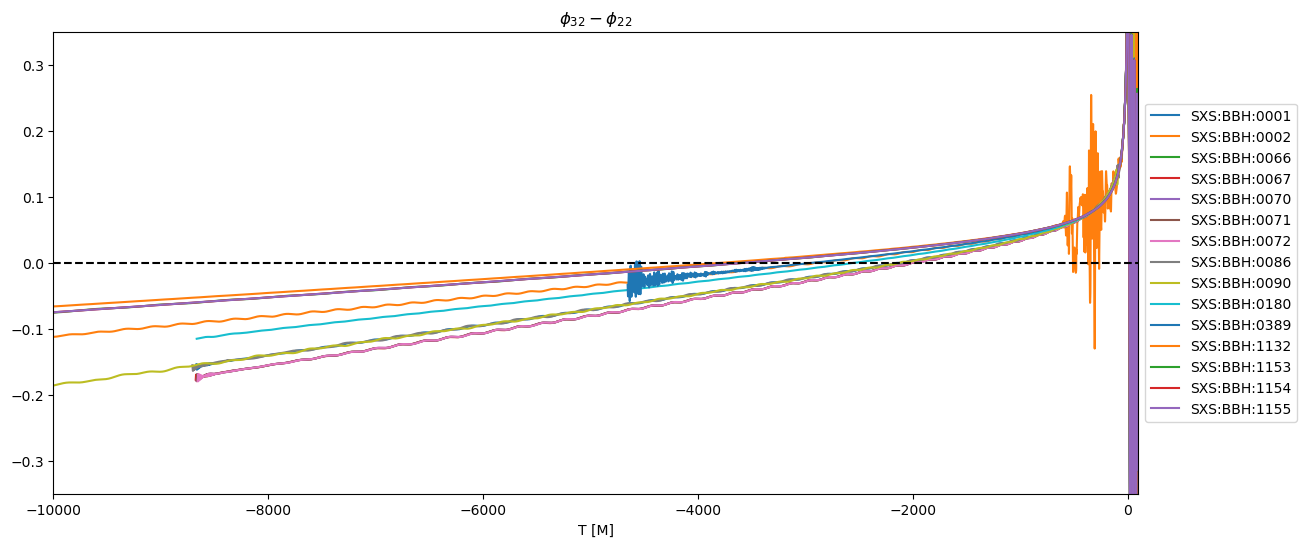

In [76]:
plt.figure(figsize=(14,6))
for k in wfs_sxs.keys():
    plt.plot(wfs_sxs[k]['t'], delta_phis[k], label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-10000, 100)
plt.ylim(-0.35,0.35)
# plt.yscale('log')

plt.axhline(0, c='k', ls='--')
plt.xlabel('T [M]')
plt.title(r'$\phi_{32} - \phi_{22}$')

(-0.25, 0.25)

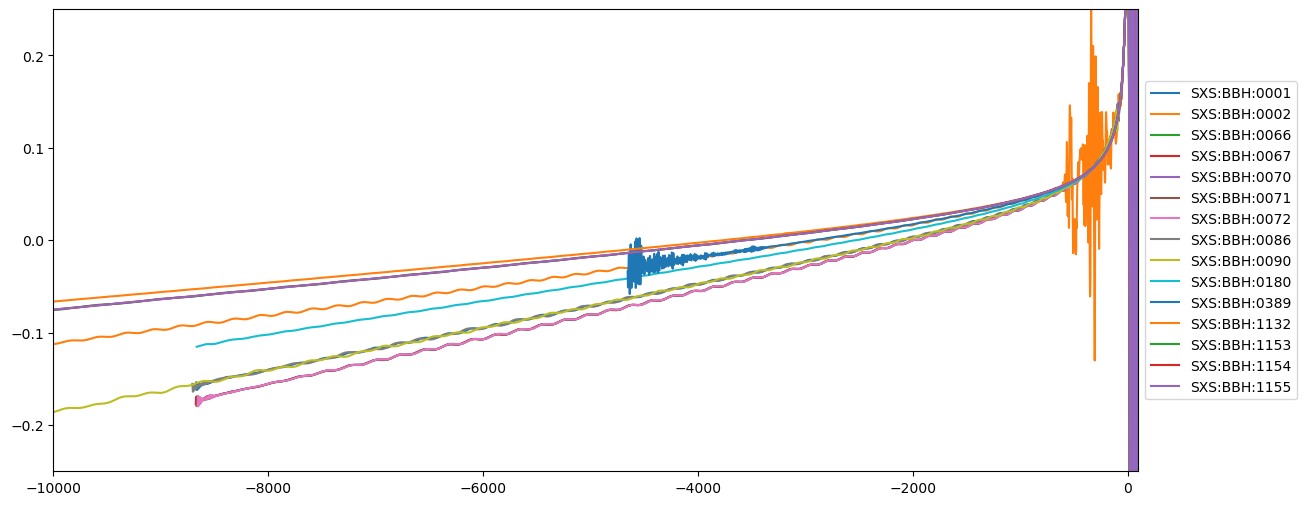

In [77]:
plt.figure(figsize=(14,6))
for k in wfs_sxs.keys():
    plt.plot(wfs_sxs[k]['t'], delta_phis[k], label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-10000, 100)
plt.ylim(-0.25,0.25)
# plt.yscale('log')

# plt.axhline(0, c='k', ls='--')

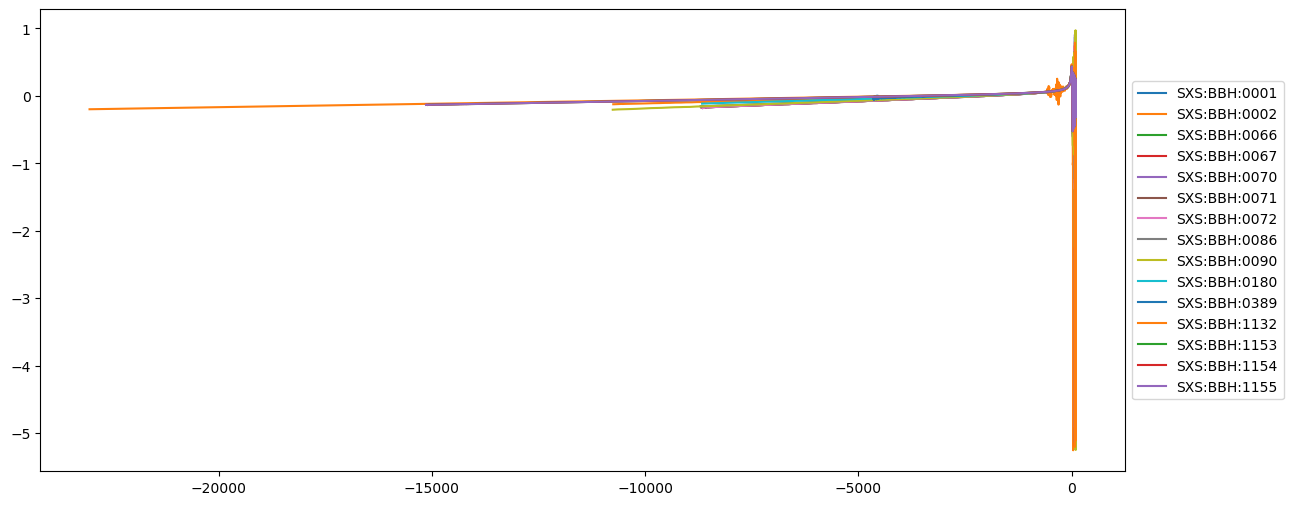

In [78]:
plt.figure(figsize=(14,6))
for k in wfs_sxs.keys():
    plt.plot(wfs_sxs[k]['t'], delta_phis[k], label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim(-4000, 100)
# plt.ylim(-0.25,0.25)
# plt.yscale('log')

# plt.axhline(0, c='k', ls='--')

In [79]:
plt.figure(figsize=(14,6))
for k in wfs_sxs.keys():
    plt.plot(wfs_sxs[k]['t'], delta_phis[k], label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-400, 100)
plt.ylim(-0.25,0.25)
# plt.yscale('log')

(-0.25, 0.25)

# output data to compare with other codes

In [80]:
import os


In [81]:
# output_dir = "/Users/sebastian.khan/personal/data/NR_COMPARISON_Q1_NS_32_22_MODE"
# base_name = "SXS"
# for k in wfs_sxs.keys():
#     times = wfs_sxs[k]['t']
#     phase_22 = wfs_sxs[k]['phase'][2,2]
#     phase_32 = wfs_sxs[k]['phase'][3,2]
#     output_data = np.c_[times, phase_22, phase_32]
#     output_file = f"{base_name}_{k}.npy"
#     np.save(os.path.join(output_dir, output_file), output_data)